## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  30.352064   562.009726  0.737203   3.012286  415.354406
1  25.144093   538.364871  0.651652   2.473581  351.587655
2  48.455038  1356.875346  0.129181  10.450930  181.967941
3  66.592907   756.251880  0.232273   1.150785  187.919068
4  61.171771   482.896804  0.418718   2.370887  211.279803


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9605708	total: 56.9ms	remaining: 56.8s
1:	learn: 0.9509197	total: 57.8ms	remaining: 28.8s
2:	learn: 0.9409150	total: 58.1ms	remaining: 19.3s
3:	learn: 0.9292454	total: 58.6ms	remaining: 14.6s
4:	learn: 0.9153521	total: 59.1ms	remaining: 11.8s
5:	learn: 0.9053373	total: 59.6ms	remaining: 9.87s
6:	learn: 0.8948822	total: 60.1ms	remaining: 8.52s
7:	learn: 0.8834266	total: 60.5ms	remaining: 7.5s
8:	learn: 0.8713755	total: 60.9ms	remaining: 6.7s
9:	learn: 0.8590044	total: 61.3ms	remaining: 6.07s
10:	learn: 0.8487138	total: 61.7ms	remaining: 5.55s
11:	learn: 0.8357165	total: 62.1ms	remaining: 5.12s
12:	learn: 0.8255805	total: 62.8ms	remaining: 4.77s
13:	learn: 0.8139342	total: 63.3ms	remaining: 4.46s
14:	learn: 0.8019964	total: 63.6ms	remaining: 4.18s
15:	learn: 0.7924726	total: 64.9ms	remaining: 3.99s
16:	learn: 0.7817735	total: 65.4ms	remaining: 3.78s
17:	learn: 0.7721988	total: 65.7ms	remaining: 3.58s
18:	learn: 0.7657128	total: 66ms	remaining: 3.

104:	learn: 0.2937726	total: 105ms	remaining: 893ms
105:	learn: 0.2905829	total: 105ms	remaining: 887ms
106:	learn: 0.2873654	total: 106ms	remaining: 881ms
107:	learn: 0.2843551	total: 106ms	remaining: 877ms
108:	learn: 0.2807347	total: 107ms	remaining: 872ms
109:	learn: 0.2779558	total: 107ms	remaining: 868ms
110:	learn: 0.2744220	total: 108ms	remaining: 862ms
111:	learn: 0.2724064	total: 108ms	remaining: 856ms
112:	learn: 0.2691853	total: 109ms	remaining: 852ms
113:	learn: 0.2669690	total: 109ms	remaining: 848ms
114:	learn: 0.2637153	total: 110ms	remaining: 844ms
115:	learn: 0.2611508	total: 110ms	remaining: 839ms
116:	learn: 0.2583150	total: 111ms	remaining: 835ms
117:	learn: 0.2552977	total: 111ms	remaining: 830ms
118:	learn: 0.2525889	total: 111ms	remaining: 825ms
119:	learn: 0.2500223	total: 112ms	remaining: 820ms
120:	learn: 0.2484552	total: 112ms	remaining: 816ms
121:	learn: 0.2459498	total: 113ms	remaining: 811ms
122:	learn: 0.2440151	total: 113ms	remaining: 807ms
123:	learn: 

285:	learn: 0.0665145	total: 187ms	remaining: 466ms
286:	learn: 0.0660567	total: 187ms	remaining: 465ms
287:	learn: 0.0656529	total: 188ms	remaining: 464ms
288:	learn: 0.0652382	total: 188ms	remaining: 462ms
289:	learn: 0.0648075	total: 188ms	remaining: 461ms
290:	learn: 0.0644040	total: 189ms	remaining: 460ms
291:	learn: 0.0639345	total: 189ms	remaining: 459ms
292:	learn: 0.0635851	total: 190ms	remaining: 458ms
293:	learn: 0.0632252	total: 190ms	remaining: 456ms
294:	learn: 0.0628306	total: 190ms	remaining: 455ms
295:	learn: 0.0624409	total: 191ms	remaining: 454ms
296:	learn: 0.0620477	total: 191ms	remaining: 453ms
297:	learn: 0.0616528	total: 192ms	remaining: 452ms
298:	learn: 0.0611799	total: 192ms	remaining: 451ms
299:	learn: 0.0608090	total: 193ms	remaining: 449ms
300:	learn: 0.0605004	total: 193ms	remaining: 448ms
301:	learn: 0.0601129	total: 193ms	remaining: 447ms
302:	learn: 0.0596919	total: 194ms	remaining: 446ms
303:	learn: 0.0593875	total: 194ms	remaining: 445ms
304:	learn: 

505:	learn: 0.0257242	total: 286ms	remaining: 279ms
506:	learn: 0.0256213	total: 287ms	remaining: 279ms
507:	learn: 0.0254943	total: 287ms	remaining: 278ms
508:	learn: 0.0253927	total: 288ms	remaining: 278ms
509:	learn: 0.0252831	total: 289ms	remaining: 277ms
510:	learn: 0.0251495	total: 289ms	remaining: 277ms
511:	learn: 0.0250519	total: 289ms	remaining: 276ms
512:	learn: 0.0249494	total: 290ms	remaining: 275ms
513:	learn: 0.0248277	total: 291ms	remaining: 275ms
514:	learn: 0.0247324	total: 291ms	remaining: 274ms
515:	learn: 0.0246349	total: 292ms	remaining: 274ms
516:	learn: 0.0245117	total: 292ms	remaining: 273ms
517:	learn: 0.0243930	total: 292ms	remaining: 272ms
518:	learn: 0.0242670	total: 293ms	remaining: 271ms
519:	learn: 0.0241744	total: 293ms	remaining: 271ms
520:	learn: 0.0240591	total: 294ms	remaining: 270ms
521:	learn: 0.0239683	total: 294ms	remaining: 269ms
522:	learn: 0.0238831	total: 295ms	remaining: 269ms
523:	learn: 0.0237700	total: 295ms	remaining: 268ms
524:	learn: 

688:	learn: 0.0135023	total: 368ms	remaining: 166ms
689:	learn: 0.0134367	total: 369ms	remaining: 166ms
690:	learn: 0.0133852	total: 369ms	remaining: 165ms
691:	learn: 0.0133373	total: 370ms	remaining: 165ms
692:	learn: 0.0132928	total: 370ms	remaining: 164ms
693:	learn: 0.0132432	total: 371ms	remaining: 163ms
694:	learn: 0.0132225	total: 371ms	remaining: 163ms
695:	learn: 0.0132022	total: 372ms	remaining: 162ms
696:	learn: 0.0131424	total: 372ms	remaining: 162ms
697:	learn: 0.0131306	total: 373ms	remaining: 161ms
698:	learn: 0.0130682	total: 373ms	remaining: 161ms
699:	learn: 0.0130259	total: 374ms	remaining: 160ms
700:	learn: 0.0129951	total: 374ms	remaining: 160ms
701:	learn: 0.0129836	total: 375ms	remaining: 159ms
702:	learn: 0.0129226	total: 375ms	remaining: 158ms
703:	learn: 0.0129112	total: 376ms	remaining: 158ms
704:	learn: 0.0128659	total: 376ms	remaining: 157ms
705:	learn: 0.0128213	total: 377ms	remaining: 157ms
706:	learn: 0.0127848	total: 377ms	remaining: 156ms
707:	learn: 

909:	learn: 0.0089543	total: 468ms	remaining: 46.3ms
910:	learn: 0.0089163	total: 469ms	remaining: 45.8ms
911:	learn: 0.0089074	total: 469ms	remaining: 45.2ms
912:	learn: 0.0088690	total: 469ms	remaining: 44.7ms
913:	learn: 0.0088464	total: 470ms	remaining: 44.2ms
914:	learn: 0.0088094	total: 470ms	remaining: 43.7ms
915:	learn: 0.0088004	total: 471ms	remaining: 43.2ms
916:	learn: 0.0087604	total: 471ms	remaining: 42.6ms
917:	learn: 0.0087518	total: 472ms	remaining: 42.1ms
918:	learn: 0.0087116	total: 472ms	remaining: 41.6ms
919:	learn: 0.0087028	total: 472ms	remaining: 41.1ms
920:	learn: 0.0086728	total: 473ms	remaining: 40.6ms
921:	learn: 0.0086641	total: 473ms	remaining: 40ms
922:	learn: 0.0086557	total: 474ms	remaining: 39.5ms
923:	learn: 0.0086473	total: 474ms	remaining: 39ms
924:	learn: 0.0086177	total: 474ms	remaining: 38.5ms
925:	learn: 0.0085823	total: 475ms	remaining: 37.9ms
926:	learn: 0.0085740	total: 475ms	remaining: 37.4ms
927:	learn: 0.0085658	total: 476ms	remaining: 36.9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

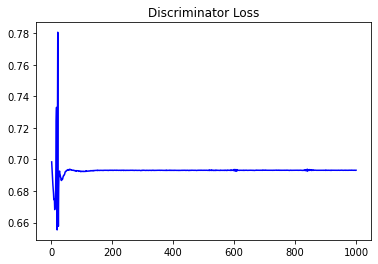

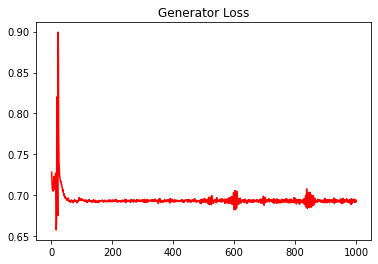

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0046955301733901415


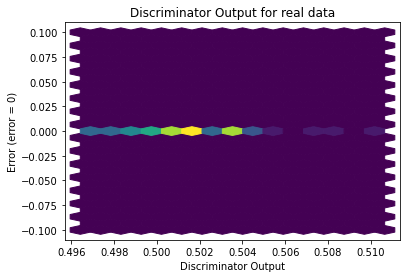

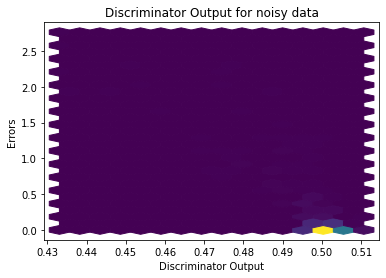

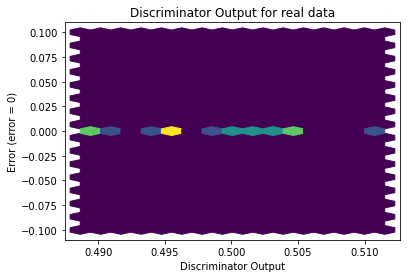

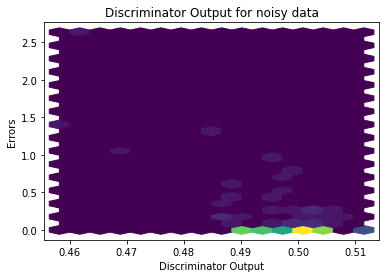

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


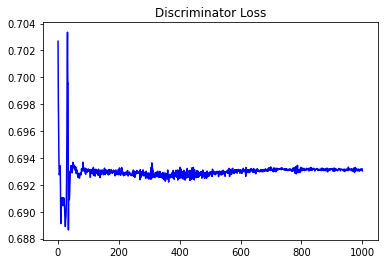

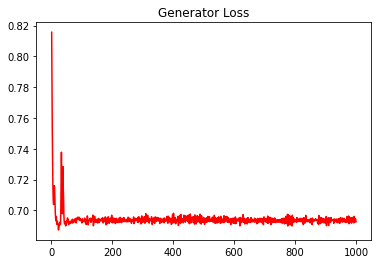

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.004853134752689626


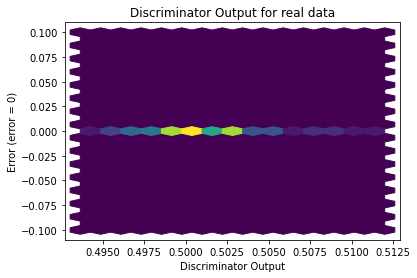

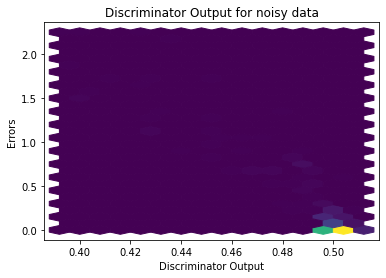

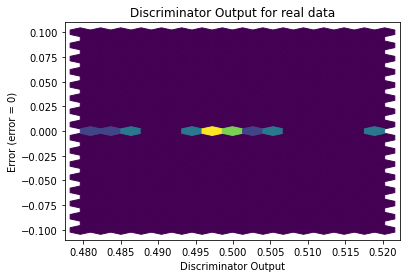

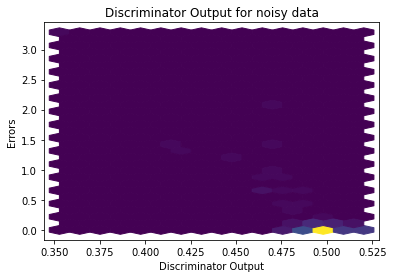

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2429]], requires_grad=True)
